Polynomial regression with l2 reg. 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.special import softmax

In [25]:
df = pd.read_csv("Student_Performance.csv")
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [26]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Добавляем новые колонки - произведения существующих, проверяем, что столбцы линейно независимы

In [27]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == "Yes" else 0)

new_df = df.drop(columns=["Performance Index"])

x: np.ndarray = df.drop(columns=["Performance Index"]).to_numpy()

x_test, x_train = x[:5000, ].copy(), x[5000:, ].copy()
print(x_test, x_train)
print(x_test.shape, x_train.shape)


columns = x_train.shape[1]
print(columns)
polynomial_degree = 1
for col1 in range(columns):
    if col1 != 2:
        # Добавляем новые параметры - все некатегориальные параметры в i-ой степени
        for i in range(2, polynomial_degree+1):
            x_train = np.column_stack((x_train, x_train[:, col1] ** i))
            x_test = np.column_stack((x_test, x_test[:, col1] ** i))
#  добавляем столбец 1 (y = wx + b => y = WX, где X = x + 1, W = w + b)
x_train = np.column_stack((x_train, np.ones(x_train.shape[0])))
x_test = np.column_stack((x_test, np.ones(x_test.shape[0])))
print(x.shape[1]) #  x.shape[1] + (x.shape[1]-1)**2 + 1 - количество признаков, после генерации новых

[[ 7 99  1  9  1]
 [ 4 82  0  4  2]
 [ 8 51  1  7  2]
 ...
 [ 3 67  1  6  0]
 [ 4 97  0  4  3]
 [ 1 69  0  5  5]] [[ 5 65  1  6  9]
 [ 3 46  1  5  0]
 [ 2 78  1  5  9]
 ...
 [ 6 83  1  8  5]
 [ 9 97  1  7  0]
 [ 7 74  0  8  1]]
(5000, 5) (5000, 5)
5
5


### Число обусловленности полученной матрицы

In [28]:
singular_values = np.linalg.svd(x_train).S
print(np.max(singular_values)/np.min(singular_values))

449.748629789943


[91. 65. 45. ... 48. 77. 46.] [91. 65. 45. ... 74. 95. 64.]
5000 10000
[91.88284844 63.20944746 45.04623268 ... 46.22504789 78.68949348
 42.44174626]
[91. 65. 45. ... 74. 95. 64.]
4.139 - MSE
4.139 - MSE on train dataset


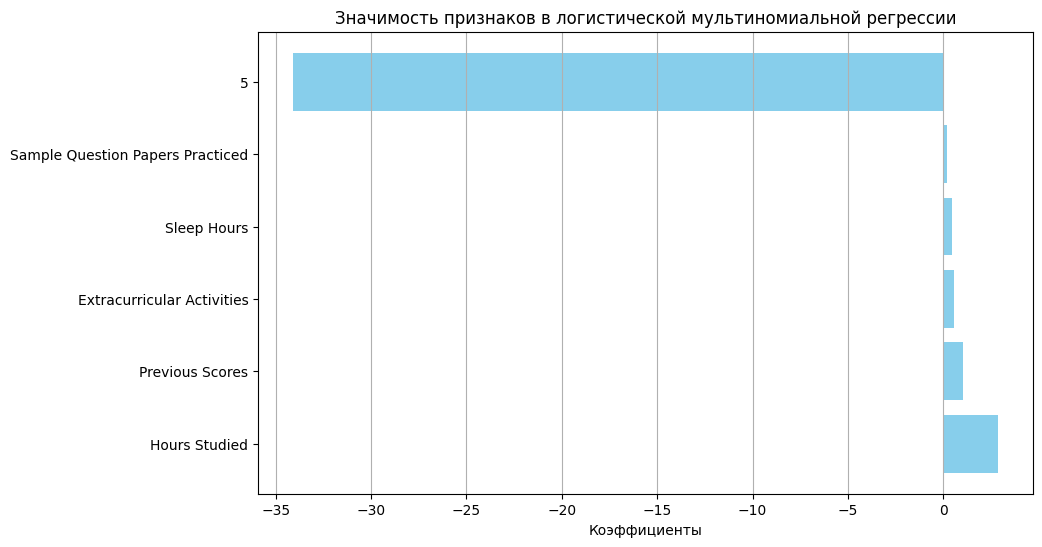

In [29]:
y: np.ndarray = df["Performance Index"].to_numpy()

y_test= y[:5000].copy() 
y_train = y[5000:].copy()
print(y_test, y)
print(len(y_test), len(y))
#print(x[0])
w = np.linalg.inv(x_train.T @ x_train) @ (x_train.T @ y_train)
y_fit = x_test@w
print(y_fit)
print(y)
MSE = np.mean((y_fit-y_test)**2)
print(f"{MSE:.3f} - MSE")
MSE_on_train = np.mean((y_fit-y_test)**2)
print(f"{MSE_on_train:.3f} - MSE on train dataset")

feature_importance = pd.DataFrame({'Feature': np.hstack((new_df.columns.values, [str(i) for i in range(len(new_df.columns), x_train.shape[1])])), 'Coefficient': w})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в логистической мультиномиальной регрессии')
plt.grid(axis='x')
plt.show()

In [30]:
print(w, len(w), np.linalg.norm(w))

[  2.85462882   1.01932512   0.58663636   0.47690408   0.19016924
 -34.08168233] 6 34.22508939097358


4.139 - MSE
4.139 - MSE on train dataset


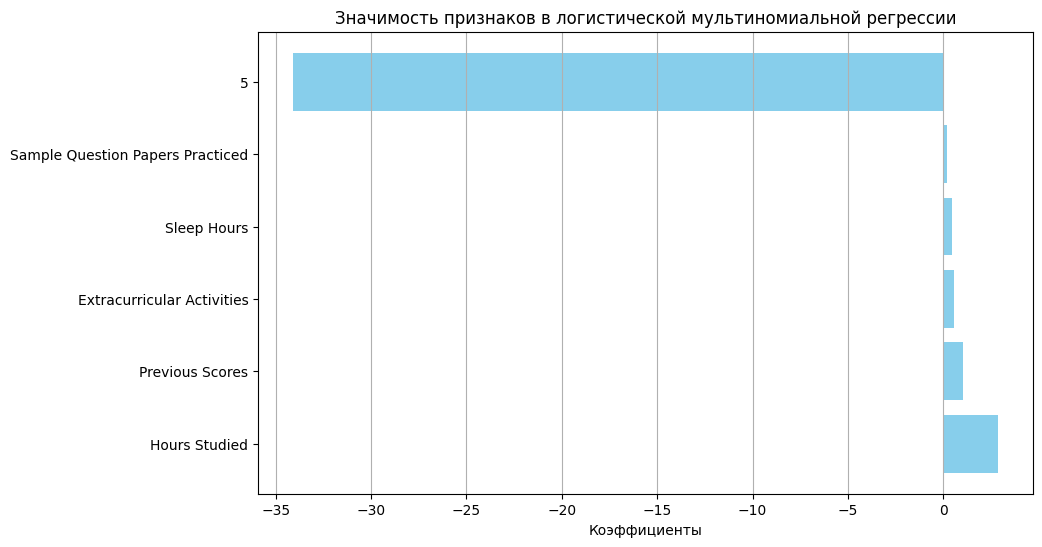

In [31]:
alpha = 0.005

#print(x[0])
w = np.linalg.inv(x_train.T @ x_train + alpha * np.eye(x_train.shape[1])) @ x_train.T @ y_train
y_fit = x_test@w
MSE = np.mean((y_fit-y_test)**2)
print(f"{MSE:.3f} - MSE")
MSE_on_train = np.mean((y_fit-y_test)**2)
print(f"{MSE_on_train:.3f} - MSE on train dataset")

feature_importance = pd.DataFrame({'Feature': np.hstack((new_df.columns.values, [str(i) for i in range(len(new_df.columns), x_train.shape[1])])), 'Coefficient': w})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в логистической мультиномиальной регрессии')
plt.grid(axis='x')
plt.show()

In [32]:
print(w, len(w), np.linalg.norm(w))

[  2.85460294   1.01931736   0.5865646    0.47682622   0.19015221
 -34.08035892] 6 34.223766723996455


### Как мы видим, многие веса модели крайне малы, гораздо эффективнее с их минимизацией справится L1 регуляризация.


In [33]:
def MSE(y, y_pred):
    return ((y - y_pred)**2).mean()

alpha = 0.01
beta = 1

l1_array = np.zeros(shape=(x_train.shape[1]))
for coordinate in range(x_train.shape[1]):
    if abs(w[coordinate]) < 10 ** -7:
        l1_array[coordinate] = 0
    elif w[coordinate] > 0:
        l1_array[coordinate] = -1/2
    else:
        l1_array[coordinate] = 1/2
        
w_elastic = np.linalg.pinv(x_train.T @ x_train + alpha * np.eye(x_train.shape[1])) @ (x_train.T @ y_train + beta * l1_array)
#y_fit = x_test@w_elastic
print(f"{MSE(y_test, x_test@w_elastic)} - MSE")

print(f"{MSE(y_train, x_train@w_elastic)} - MSE on train dataset")
print(w_elastic, len(w_elastic), np.linalg.norm(w_elastic))

4.138779622456033 - MSE
4.1652839975311275 - MSE on train dataset
[  2.85448815   1.01928673   0.58588641   0.47648205   0.19007457
 -34.07458765] 6 34.21799231348832


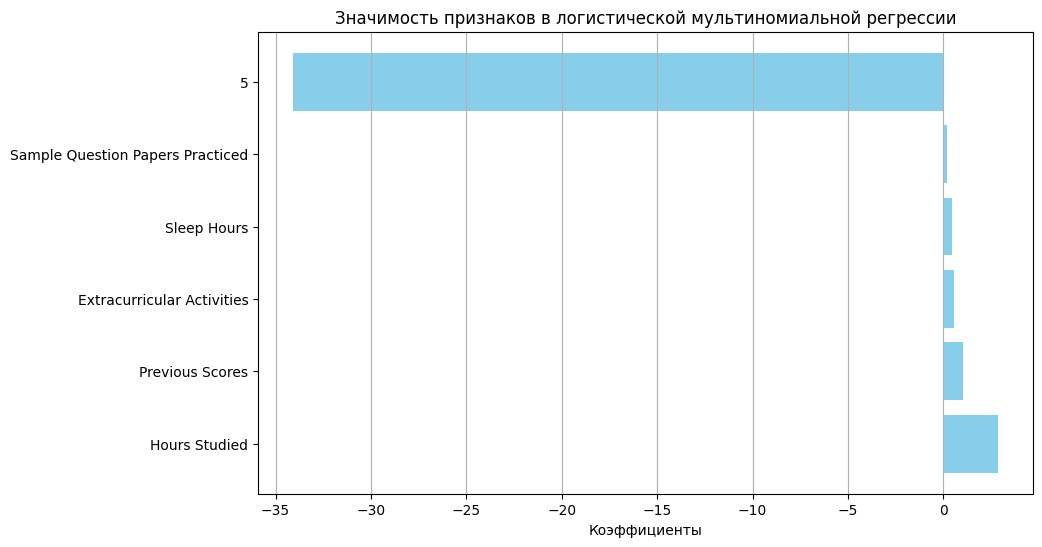

In [34]:
feature_importance = pd.DataFrame({'Feature': np.hstack((new_df.columns.values, [str(i) for i in range(len(new_df.columns), x_train.shape[1])])), 'Coefficient': w_elastic})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в логистической мультиномиальной регрессии')
plt.grid(axis='x')
plt.show()

In [35]:
def convert_100_5(x):
    conversion = {20: 0,
                  40: 1,
                  60: 2,
                  80: 3,
                  100: 4,}
    for key, el in conversion.items():
        if x <= key:
            return el

y_converted = np.array([convert_100_5(x) for x in y_train])
y_test_converted = np.array([convert_100_5(int(x)) for x in y_test], dtype=int)
y_fit_converted = np.array([convert_100_5(x) for x in y_fit])
#понадобится потом

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(solver="newton-cg", max_iter=1000)
model.fit(x_train, y_converted)
y_classification = model.predict(x_test)
print(y_classification)
print(min(y_classification), max(y_classification))
print(f'{accuracy_score(y_classification, y_test_converted)} - acc of classification task')
print(f'{accuracy_score(y_test_converted, y_fit_converted)} - acc of regression task')

[4 3 2 ... 2 3 2]
0 4
0.9178 - acc of classification task
0.9136 - acc of regression task


In [38]:
print(new_df.columns.values )
print([i for i in range(len(new_df.columns), x_train.shape[1])])

['Hours Studied' 'Previous Scores' 'Extracurricular Activities'
 'Sleep Hours' 'Sample Question Papers Practiced']
[5]


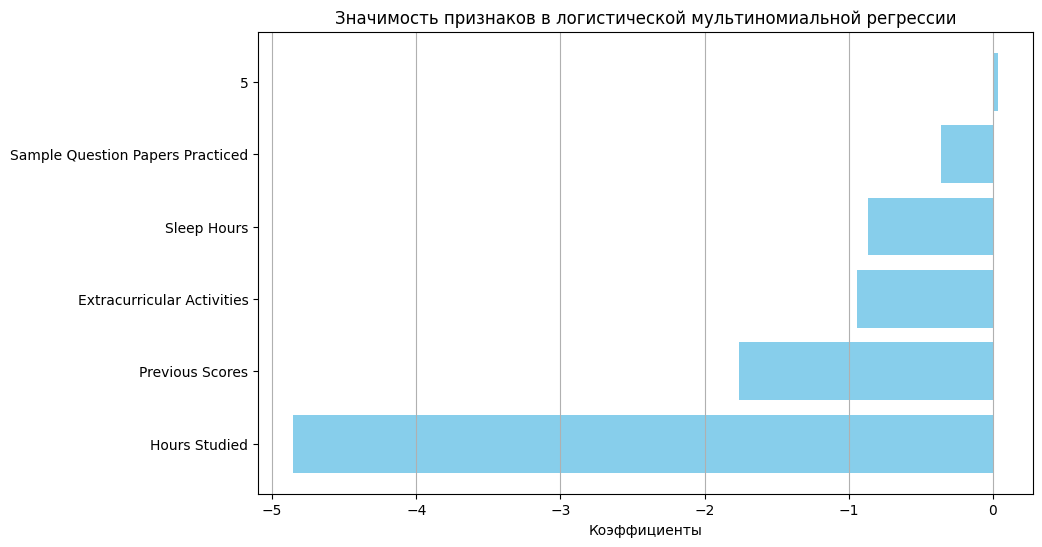

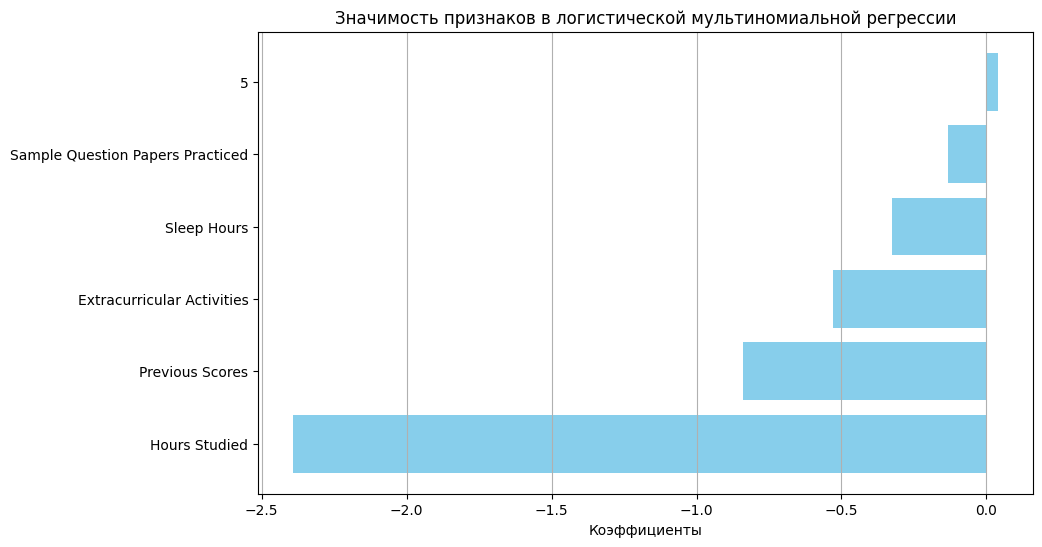

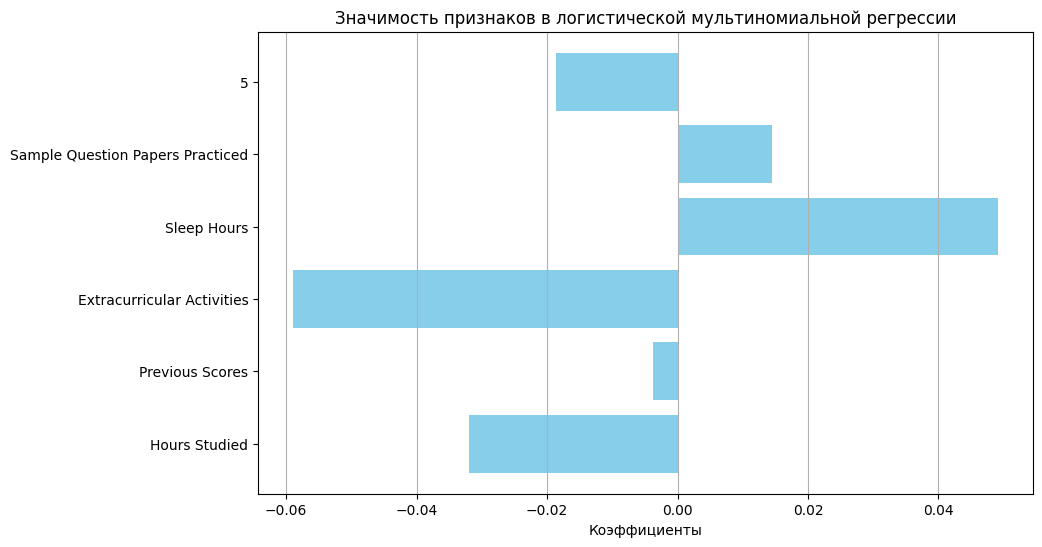

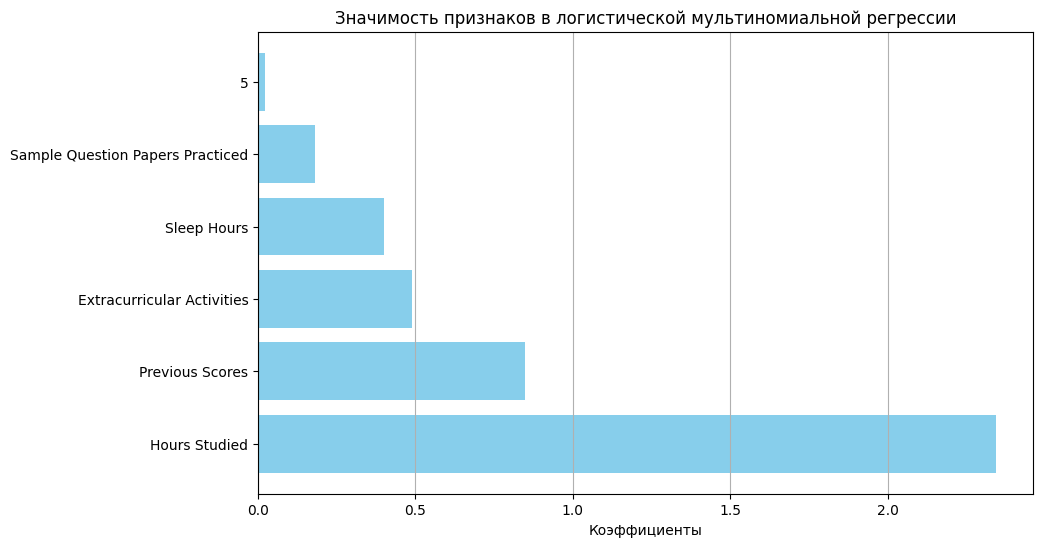

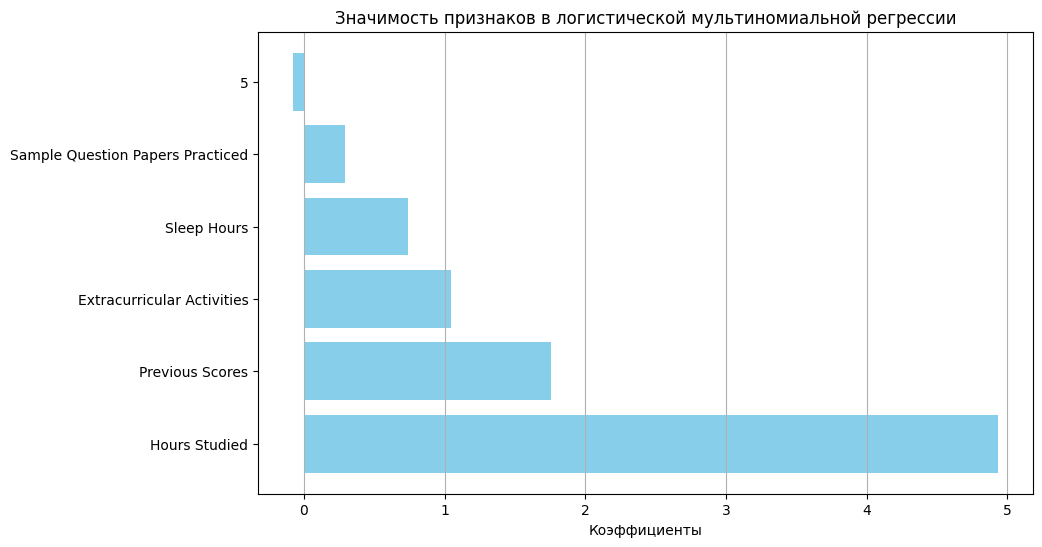

In [39]:
model_coefficients = model.coef_
for coefficients in model_coefficients:
    feature_importance = pd.DataFrame({'Feature': np.hstack((new_df.columns.values, [str(i) for i in range(len(new_df.columns), x_train.shape[1])])), 'Coefficient': coefficients})

    #feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
    plt.xlabel('Коэффициенты')
    plt.title('Значимость признаков в логистической мультиномиальной регрессии')
    plt.grid(axis='x')
    plt.show()